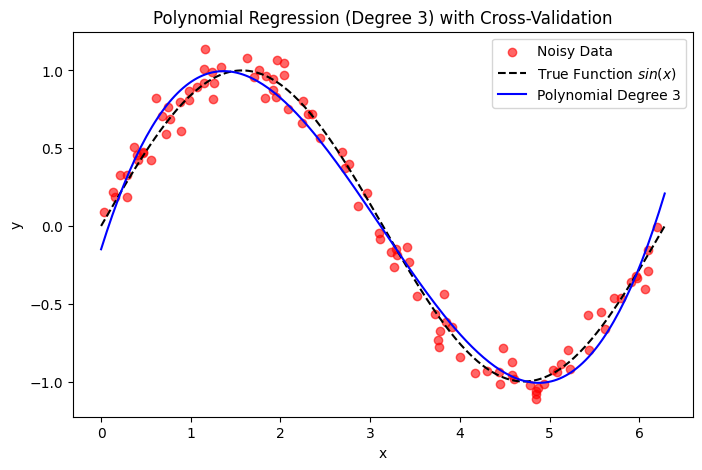

(3,
 [np.float64(0.20482763378431876),
  np.float64(0.2108564330483861),
  np.float64(0.013118572910376648),
  np.float64(0.013765833920546807)])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold


np.random.seed(42)
x = np.random.uniform(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

#  Cross-validation for polynomial degrees 1 to 4
degrees = [1, 2, 3, 4]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()

    mse = -cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=kf).mean()
    mse_scores.append(mse)

# Select the best degree
best_degree = degrees[np.argmin(mse_scores)]

# Step 4: Train model with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, y)

# Generate smooth curve for visualization
x_plot = np.linspace(0, 2 * np.pi, 200)
y_true = np.sin(x_plot)
X_plot_poly = poly.transform(x_plot.reshape(-1, 1))
y_pred = model.predict(X_plot_poly)

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Noisy Data", color="red", alpha=0.6)
plt.plot(x_plot, y_true, label="True Function $sin(x)$", linestyle="dashed", color="black")
plt.plot(x_plot, y_pred, label=f"Polynomial Degree {best_degree}", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Polynomial Regression (Degree {best_degree}) with Cross-Validation")
plt.show()

# Output best degree and MSE scores
best_degree, mse_scores


Without sklearn

without sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
x = np.random.uniform(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Sort for plotting
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_sorted = y[sort_idx]

In [3]:
def fit_polynomial(x, y, degree):
    """Fit polynomial regression using least squares."""
    X = np.vander(x, degree + 1, increasing=True)  # Vandermonde matrix
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]  # Solve Xβ = y
    return coeffs

def predict_polynomial(x, coeffs):
    """Predict y using polynomial coefficients."""
    return np.polyval(coeffs[::-1], x)  # Reverse coeffs for np.polyval

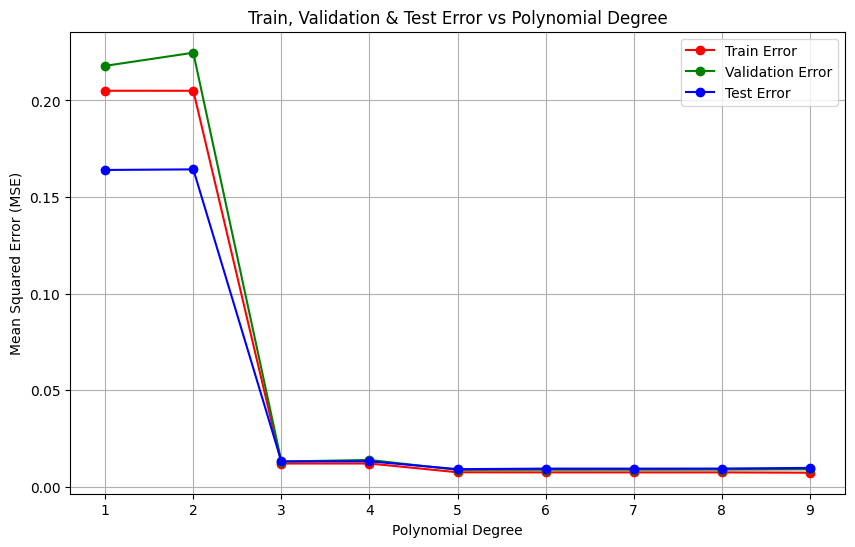

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
x = np.random.uniform(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Split into train (80%) and test (20%)
split_idx = int(0.8 * len(x))
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

def fit_polynomial(x, y, degree):
    """Fit polynomial regression using least squares."""
    X = np.vander(x, degree + 1, increasing=True)
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    return coeffs

def predict_polynomial(x, coeffs):
    """Predict y using polynomial coefficients."""
    return np.polyval(coeffs[::-1], x)

# Initialize
k_folds = 5
degrees = np.arange(1, 10)  # Test degrees from 1 to 9
train_errors = []
validation_errors = []
test_errors = []

# Shuffle train data for CV
shuffle_idx = np.random.permutation(len(x_train))
x_train_shuffled, y_train_shuffled = x_train[shuffle_idx], y_train[shuffle_idx]

# Perform 5-fold CV for different degrees
for degree in degrees:
    fold_size = len(x_train) // k_folds
    mse_folds = []

    for fold in range(k_folds):
        val_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
        x_val, y_val = x_train_shuffled[val_idx], y_train_shuffled[val_idx]
        x_train_fold = np.delete(x_train_shuffled, val_idx)
        y_train_fold = np.delete(y_train_shuffled, val_idx)

        # Fit model
        coeffs = fit_polynomial(x_train_fold, y_train_fold, degree)

        # Compute MSE for validation fold
        y_val_pred = predict_polynomial(x_val, coeffs)
        mse_folds.append(np.mean((y_val - y_val_pred) ** 2))

    # Compute average validation error
    validation_errors.append(np.mean(mse_folds))

    # Compute training error
    coeffs_full = fit_polynomial(x_train, y_train, degree)
    y_train_pred = predict_polynomial(x_train, coeffs_full)
    train_errors.append(np.mean((y_train - y_train_pred) ** 2))

    # Compute test error
    y_test_pred = predict_polynomial(x_test, coeffs_full)
    test_errors.append(np.mean((y_test - y_test_pred) ** 2))

# Plot errors vs degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'r-o', label="Train Error")
plt.plot(degrees, validation_errors, 'g-o', label="Validation Error")
plt.plot(degrees, test_errors, 'b-o', label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Train, Validation & Test Error vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Initialize
k_folds = 5
degrees = [1, 2, 3, 4]
mse_cv = np.zeros(len(degrees))
train_errors = []
validation_errors = []
test_errors = []
# Shuffle data
shuffle_idx = np.random.permutation(len(x))
x_shuffled, y_shuffled = x[shuffle_idx], y[shuffle_idx]

# Perform 5-fold CV
for i, degree in enumerate(degrees):
    mse_folds = []
    fold_size = len(x) // k_folds

    for fold in range(k_folds):
        # Split into train/validation
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size
        x_val = x_shuffled[val_start:val_end]
        y_val = y_shuffled[val_start:val_end]
        x_train = np.concatenate([x_shuffled[:val_start], x_shuffled[val_end:]])
        y_train = np.concatenate([y_shuffled[:val_start], y_shuffled[val_end:]])

        # Fit model
        coeffs = fit_polynomial(x_train, y_train, degree)
        y_pred = predict_polynomial(x_val, coeffs)

        # Compute MSE
        mse_folds.append(np.mean((y_val - y_pred) ** 2))

    # Average MSE across folds
    mse_cv[i] = np.mean(mse_folds)

# Find best degree
best_degree = degrees[np.argmin(mse_cv)]
print(f"Best degree: {best_degree}")
print(f"Cross-validated MSEs: {mse_cv}")

Best degree: 3
Cross-validated MSEs: [0.21286277 0.21641187 0.01312234 0.01333922]


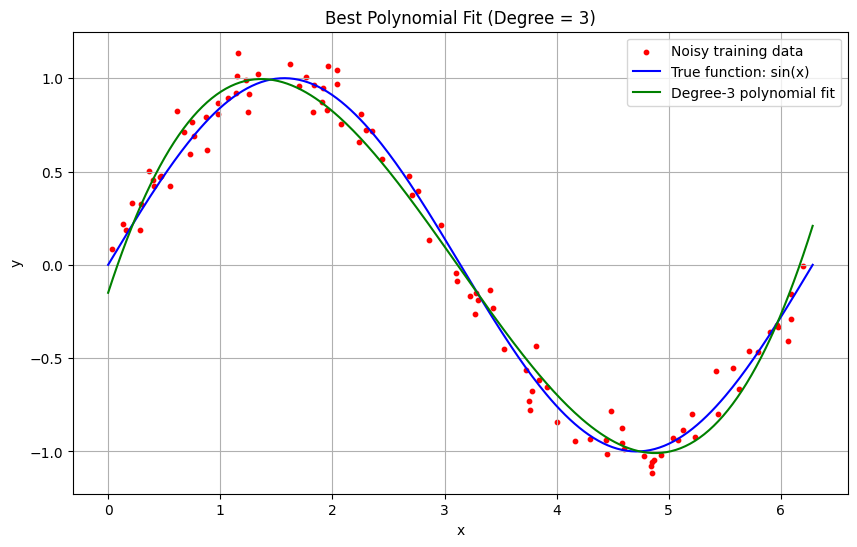

In [5]:
# Fit best model
coeffs = fit_polynomial(x, y, best_degree)

# Generate predictions for smooth curve
x_plot = np.linspace(0, 2 * np.pi, 300)
y_plot = predict_polynomial(x_plot, coeffs)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', s=10, label='Noisy training data')
plt.plot(x_plot, np.sin(x_plot), 'b-', label='True function: sin(x)')
plt.plot(x_plot, y_plot, 'g-', label=f'Degree-{best_degree} polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Best Polynomial Fit (Degree = {best_degree})')
plt.grid(True)
plt.show()